<h1> Ab hier unser Model </h1>

In [2]:
# Import the needed libraries
import numpy as np  
import pandas as pd  
import tensorflow as tf  
import urllib.request as request  
import matplotlib.pyplot as plt

# Download dataset
IRIS_TRAIN_URL = "churn-einzelhandel-train.csv"  
IRIS_TEST_URL = "churn-einzelhandel-test.csv"

names = ['churn_flag', 'timezone_cd', 'tenure_visit', 'branch', 'abc_cd', 'abc_detailed_cd', 'avg_no_main_cat_1y', 'avg_no_main_cat_q1', 'avg_no_main_cat_q2', 'avg_no_main_cat_th', 'avg_no_main_cat_lh', 'avg_articles_6_6', 'avg_articles_q1_q2', 'ret_visits_per_chg_q1_q2', 'ret_sales_per_chg_q1_q2', 'visit_gap_ratio_th', 'visit_gap_ratio_1y', 'visit_gap_ratio_per_chg_6_6', 'avg_days_between_visits', 'home_st_visits_per_q1', 'home_st_visits_per_6_6', 'basket_spend', 'basket_spend_per_chg_6_6', 'basket_spend_per_chg_q1_q2', 'f_sales_per_chg_6_6', 'nf_visits_per_chg_6_6', 'nf_sales_per_chg_6_6', 'p_visits_per_chg_6_6', 'p_sales_per_chg_6_6', 'ret_visits_per_chg_6_6', 'ret_sales_per_chg_6_6', 'f_visits_per_chg_q1_q2', 'nf_visits_per_chg_q1_q2', 'nf_sales_per_chg_q1_q2', 'p_visits_per_chg_q1_q2', 'p_sales_per_chg_q1_q2', 'consistency_mnth_cd', 'consistency_qtr_cd', 'distinct_weeks_bought', 'expect_visit_flag', 'expect_visit_flag2', 'promo_sales_per', 'margin_per', 'food_sales_per', 'food_promo_per', 'nf_promo_per', 'food_colli_per', 'food_pieces_per', 'sales_last_model_period_per', 'visits_last_model_period_per', 'distinct_stores', 'recency', 'margin_1y', 'home_visits_q1', 'home_visits_lh', 'home_visits_th', 'visit_gap_th', 'visit_gap_lh', 'visit_gap_1y', 'promo_sales_1y', 'promo_sales_q1', 'promo_sales_q2', 'promo_sales_th', 'promo_sales_lh', 'nf_promo_sales', 'food_promo_sales', 'promo_visits_q1', 'promo_visits_q2', 'promo_visits_th', 'promo_visits_lh', 'promo_visits_1y', 'nf_sales_1y', 'nf_sales_q1', 'nf_sales_q2', 'nf_sales_th', 'nf_sales_lh', 'nf_visits_q1', 'nf_visits_q2', 'nf_visits_th', 'nf_visits_lh', 'food_sales_1y', 'food_sales_th', 'food_sales_lh', 'food_visits_1y', 'food_visits_q1', 'food_visits_q2', 'pieces', 'food_colli', 'food_pieces', 'colli_1y', 'colli_q1', 'home_store_visits_q1', 'home_store_visits_th', 'home_store_visits_lh', 'visits_q1', 'visits_q2', 'visits_q3', 'visits_q4', 'visits_1y', 'visits_th', 'visits_lh', 'sales_1y', 'sales_q1', 'sales_q2', 'sales_q3', 'sales_q4', 'sales_th', 'sales_lh', 'ret_visits_q1', 'ret_visits_q2', 'ret_visits_th', 'ret_visits_lh', 'ret_sales_q1', 'ret_sales_q2', 'ret_sales_th', 'ret_sales_lh', 'ret_sales_1y', 'prediction_week']  
train = pd.read_csv(IRIS_TRAIN_URL, names=names, skiprows=0)  
test = pd.read_csv(IRIS_TEST_URL, names=names, skiprows=0)

print(test.head())

# Train and test input data
Xtrain = train.drop("churn_flag", axis=1)  
Xtest = test.drop("churn_flag", axis=1)

# Encode target values into binary ('one-hot' style) representation
ytrain = pd.get_dummies(train.churn_flag)  
ytest = pd.get_dummies(test.churn_flag)  

   churn_flag  timezone_cd  tenure_visit  branch  abc_cd  abc_detailed_cd  \
0         0.0         0.00      0.955556     0.0     0.0         0.142857   
1         0.0         0.50      0.944444     0.0     1.0         0.857143   
2         1.0         0.25      0.344444     1.0     0.0         0.428571   
3         1.0         0.25      0.944444     1.0     1.0         0.857143   
4         0.0         0.50      0.933333     0.0     1.0         1.000000   

   avg_no_main_cat_1y  avg_no_main_cat_q1  avg_no_main_cat_q2  \
0            0.172433            0.068872            0.123791   
1            0.036196            0.058810            0.027079   
2            0.016837            0.022006            0.023211   
3            0.320380            0.219982            0.268859   
4            0.040931            0.022006            0.064990   

   avg_no_main_cat_th       ...         ret_visits_q1  ret_visits_q2  \
0            0.091480       ...              0.074074       0.000000   
1 

In [69]:
# Create and train a tensorflow model of a neural network
def create_train_model(hidden_nodes, num_iters):

    # Reset the graph
    tf.reset_default_graph()

    # Placeholders for input and output data
    X = tf.placeholder(shape=(14854, 117), dtype=tf.float64, name='X')
    y = tf.placeholder(shape=(14854, 2), dtype=tf.float64, name='y')
    
    # Variables for two group of weights between the three layers of the network
    W1 = tf.Variable(np.random.rand(117, hidden_nodes), dtype=tf.float64)
    W2 = tf.Variable(np.random.rand(hidden_nodes, 2), dtype=tf.float64)

    # Create the neural net graph
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))
    
    # Define a loss function
    deltas = tf.square(y_est - y)
    loss = tf.reduce_sum(deltas)

    # Define a train operation to minimize the loss
    optimizer = tf.train.GradientDescentOptimizer(0.005)
    train = optimizer.minimize(loss)

    # Initialize variables and run session
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    # Go through num_iters iterations
    for i in range(num_iters):
        #print(i)
        sess.run(train, feed_dict={X: Xtrain, y: ytrain})
        loss_plot[hidden_nodes].append(sess.run(loss, feed_dict={X: Xtrain.as_matrix(), y: ytrain.as_matrix()}))
        weights1 = sess.run(W1)
        weights2 = sess.run(W2)
        
    print("loss (hidden nodes: %d, iterations: %d): %.2f" % (hidden_nodes, num_iters, loss_plot[hidden_nodes][-1]))
    sess.close()
    return weights1, weights2

loss (hidden nodes: 50, iterations: 100): 14854.00
loss (hidden nodes: 100, iterations: 100): 14854.00
loss (hidden nodes: 200, iterations: 100): 14854.00


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


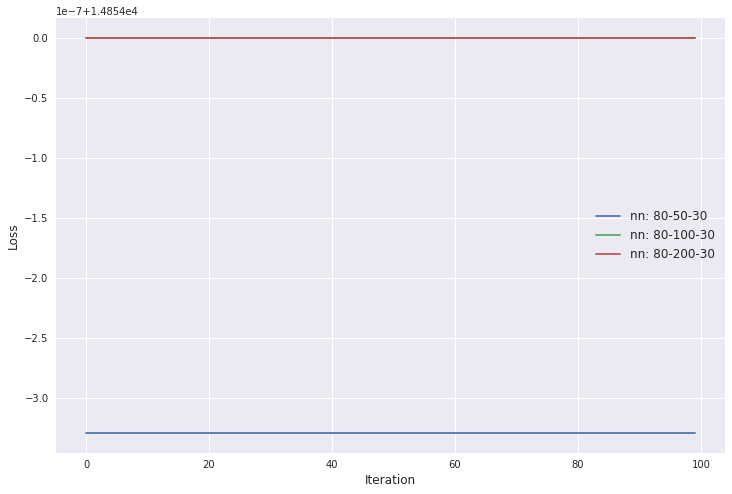

In [70]:
# Run the training for 3 different network architectures: (4-5-3) (4-10-3) (4-20-3)

# Plot the loss function over iterations
num_hidden_nodes = [50, 100, 200]
loss_plot = {50: [], 100: [], 200: []}  
weights1 = {50: None, 100: None, 200: None}  
weights2 = {50: None, 100: None, 200: None}  
num_iters = 100

plt.figure(figsize=(12,8))  
for hidden_nodes in num_hidden_nodes:  
    weights1[hidden_nodes], weights2[hidden_nodes] = create_train_model(hidden_nodes, num_iters)
    plt.plot(range(num_iters), loss_plot[hidden_nodes], label="nn: 80-%d-30" % hidden_nodes)

plt.xlabel('Iteration', fontsize=12)  
plt.ylabel('Loss', fontsize=12)  
plt.legend(fontsize=12) 

In [72]:
# Evaluate models on the test set
X = tf.placeholder(shape=(4951, 117), dtype=tf.float64, name='X')  
y = tf.placeholder(shape=(4951, 2), dtype=tf.float64, name='y')

for hidden_nodes in num_hidden_nodes:

    # Forward propagation
    W1 = tf.Variable(weights1[hidden_nodes])
    W2 = tf.Variable(weights2[hidden_nodes])
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))

    # Calculate the predicted outputs
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        y_est_np = sess.run(y_est, feed_dict={X: Xtest, y: ytest})

    #Calculate the prediction accuracy
    correct = [estimate.argmax(axis=0) == target.argmax(axis=0) 
               for estimate, target in zip(y_est_np, ytest.as_matrix())]
    accuracy = 100 * sum(correct) / len(correct)
    print('Network architecture 80-%d-30, accuracy: %.2f%%' % (hidden_nodes, accuracy))

Network architecture 80-50-30, accuracy: 49.89%
Network architecture 80-100-30, accuracy: 49.89%
Network architecture 80-200-30, accuracy: 49.89%


In [75]:
from sklearn.metrics import *

# Evaluate models on the test set
X = tf.placeholder(shape=(4951, 117), dtype=tf.float64, name='X')  
y = tf.placeholder(shape=(4951, 2), dtype=tf.float64, name='y')

for hidden_nodes in num_hidden_nodes:

    # Forward propagation
    W1 = tf.Variable(weights1[hidden_nodes])
    W2 = tf.Variable(weights2[hidden_nodes])
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))

    # Calculate the predicted outputs
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        y_est_np = sess.run(y_est, feed_dict={X: Xtest, y: ytest})

    #Calculate the prediction accuracy
    y_true = []
    y_pred = []
    for estimate, target in zip(y_est_np, ytest.as_matrix()):
      y_pred.append(estimate.argmax(axis=0))
      y_true.append(target.argmax(axis=0))
    accuracy = 100 * sum(correct) / len(correct)
    print('frist acc', accuracy)
    print('precision', precision_score(y_true, y_pred, average='weighted'))
    print('recall', recall_score(y_true, y_pred, average='weighted'))
    print('f1_score', f1_score(y_true, y_pred, average='weighted'))
    print('accuracy', accuracy_score(y_true, y_pred))

frist acc 49.888911331044234
precision 0.24889034737967938
recall 0.49888911331044233
f1_score 0.3320997466316649
accuracy 0.49888911331044233
frist acc 49.888911331044234
precision 0.24889034737967938
recall 0.49888911331044233
f1_score 0.3320997466316649
accuracy 0.49888911331044233


/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


frist acc 49.888911331044234
precision 0.24889034737967938
recall 0.49888911331044233
f1_score 0.3320997466316649
accuracy 0.49888911331044233
